In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from data import data_preprocess
from evaluation import metrics
from model import end2end, end2end_crps

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('crimes')

In [3]:
end2end_model = end2end_crps.train_model(x_train, y_train, n_epoch = 500, num_models = 5, hidden_layers = [50, 50], learning_rate = 0.001, tanh = True, calibration_threshold = .03, exp_decay = .998)

initial loss:  -0.19121165573596954
251 0.07610177777777773 tensor(-4.4316, grad_fn=<MeanBackward0>) tensor(0.0497, grad_fn=<MeanBackward0>)
253 0.06674044444444441 tensor(-4.4449, grad_fn=<MeanBackward0>) tensor(0.0495, grad_fn=<MeanBackward0>)
255 0.05810444444444444 tensor(-4.4621, grad_fn=<MeanBackward0>) tensor(0.0492, grad_fn=<MeanBackward0>)
257 0.06120311111111108 tensor(-4.4659, grad_fn=<MeanBackward0>) tensor(0.0492, grad_fn=<MeanBackward0>)
259 0.06510977777777774 tensor(-4.4686, grad_fn=<MeanBackward0>) tensor(0.0491, grad_fn=<MeanBackward0>)
261 0.0695964444444444 tensor(-4.4729, grad_fn=<MeanBackward0>) tensor(0.0491, grad_fn=<MeanBackward0>)
262 0.033412888888888916 tensor(-4.4746, grad_fn=<MeanBackward0>) tensor(0.0491, grad_fn=<MeanBackward0>)
263 0.0805804444444444 tensor(-4.4677, grad_fn=<MeanBackward0>) tensor(0.0493, grad_fn=<MeanBackward0>)
264 0.0376377777777778 tensor(-4.4723, grad_fn=<MeanBackward0>) tensor(0.0493, grad_fn=<MeanBackward0>)
265 0.078764444444444

361 0.049748444444444415 tensor(-4.7418, grad_fn=<MeanBackward0>) tensor(0.0449, grad_fn=<MeanBackward0>)
363 0.050797777777777754 tensor(-4.7451, grad_fn=<MeanBackward0>) tensor(0.0449, grad_fn=<MeanBackward0>)
365 0.057271999999999976 tensor(-4.7385, grad_fn=<MeanBackward0>) tensor(0.0449, grad_fn=<MeanBackward0>)
367 0.0609751111111111 tensor(-4.7409, grad_fn=<MeanBackward0>) tensor(0.0448, grad_fn=<MeanBackward0>)
369 0.06021555555555554 tensor(-4.7441, grad_fn=<MeanBackward0>) tensor(0.0447, grad_fn=<MeanBackward0>)
370 0.03254355555555557 tensor(-4.7416, grad_fn=<MeanBackward0>) tensor(0.0448, grad_fn=<MeanBackward0>)
371 0.06275066666666665 tensor(-4.7340, grad_fn=<MeanBackward0>) tensor(0.0446, grad_fn=<MeanBackward0>)
372 0.032254666666666675 tensor(-4.7419, grad_fn=<MeanBackward0>) tensor(0.0447, grad_fn=<MeanBackward0>)
373 0.05836622222222218 tensor(-4.7431, grad_fn=<MeanBackward0>) tensor(0.0445, grad_fn=<MeanBackward0>)
375 0.05062799999999995 tensor(-4.7614, grad_fn=<Mea

477 0.05087199999999997 tensor(-4.9663, grad_fn=<MeanBackward0>) tensor(0.0418, grad_fn=<MeanBackward0>)
479 0.05330133333333332 tensor(-4.9665, grad_fn=<MeanBackward0>) tensor(0.0418, grad_fn=<MeanBackward0>)
480 0.030068000000000008 tensor(-4.9678, grad_fn=<MeanBackward0>) tensor(0.0419, grad_fn=<MeanBackward0>)
481 0.055771999999999954 tensor(-4.9616, grad_fn=<MeanBackward0>) tensor(0.0417, grad_fn=<MeanBackward0>)
482 0.03264711111111115 tensor(-4.9639, grad_fn=<MeanBackward0>) tensor(0.0419, grad_fn=<MeanBackward0>)
483 0.053979555555555545 tensor(-4.9633, grad_fn=<MeanBackward0>) tensor(0.0417, grad_fn=<MeanBackward0>)
485 0.045245333333333304 tensor(-4.9801, grad_fn=<MeanBackward0>) tensor(0.0415, grad_fn=<MeanBackward0>)
487 0.04248933333333332 tensor(-4.9873, grad_fn=<MeanBackward0>) tensor(0.0414, grad_fn=<MeanBackward0>)
489 0.04308977777777774 tensor(-4.9862, grad_fn=<MeanBackward0>) tensor(0.0414, grad_fn=<MeanBackward0>)
491 0.04343111111111109 tensor(-4.9841, grad_fn=<Me

End2end test MAPE:  0.6277194
End2end test RMSE:  0.13675535
End2end test NLLK:  5.740222
End2end test CRPS:  tensor(0.0696)


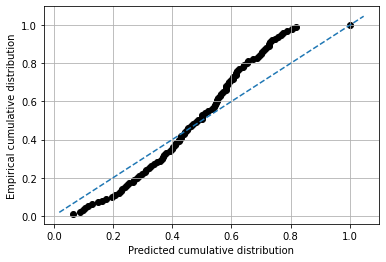

End2end test calibration error when step size is 0.001:  10.101171095128969
End2end test calibration error when step size is 0.01:  0.9993218445663222
End2end test calibration error when step size is 0.1:  0.08556155343161256


In [4]:
mean_pred, var_pred = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = var_pred.detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))